In [91]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
import numpy as np
import matplotlib.pyplot as plt
import missingno
%matplotlib inline

# Creating DF

In [92]:
# Creating the df from excel file
file = 'Info_BDApnea_QuironMalaga_rev1.xlsx'
xl = pd.ExcelFile(file)
##print(xl.sheet_names)
df_tmp = xl.parse('Hoja1')
df_tmp.head()

,Patient,Comentarios,Audios tumbado,Fotos,Audio fs KHz,Gender,EPWORTH,IAH,IAH Supino,IAH Lateral,Peso,Talla,IMC,Edad,PerCervical,Fumador,Roncador,Enfermedades,Sala/Ruidos,Imagen,Dialecto,DIST EXT OJOS,DIST BARB-LOB,Cansancio,Concentrarse,PerdRespNoche,HiperT,EstHOSP
0,P0001,es el Patient0002 (fotos) 3 (sentado) y 4 (tum...,si,si,16,hombre,NaN,71.0,-1,-1,82.0,168.0,-1.0,39.0,-1.0,ns,ns,Septo_Nasal_Desviado,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P0002,Es el Patient0006 (sentado) y 7 (tumbado),si,si,16,hombre,NaN,29.6,-1,-1,119.0,174.0,-1.0,56.0,48.0,si,ns,nd,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P0003,"Patient 8, 9 y 10",si,si,16,hombre,NaN,56.0,-1,-1,-1.0,-1.0,-1.0,46.0,43.0,si,ns,nd,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P0004,Patient 13 y 14,si_codigos,si,16,hombre,NaN,19.7,-1,-1,78.0,168.0,-1.0,39.0,42.0,no,ns,Hiperactividad_bronquial,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P0005,Patient0015 los códigos QMH5,si_codigos,si,16,hombre,NaN,9.0,-1,-1,80.0,173.0,-1.0,32.0,40.0,no,ns,Septo_Nasal_Desviado_Operado,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
df_tmp.dtypes

Patient            object
Comentarios        object
Audios tumbado     object
Fotos              object
Audio fs KHz       object
Gender             object
EPWORTH            object
IAH               float64
IAH Supino         object
IAH Lateral        object
Peso              float64
Talla             float64
IMC               float64
Edad              float64
PerCervical       float64
Fumador            object
Roncador           object
Enfermedades       object
Sala/Ruidos        object
Imagen             object
Dialecto           object
DIST EXT OJOS     float64
DIST BARB-LOB      object
Cansancio          object
Concentrarse       object
PerdRespNoche      object
HiperT            float64
EstHOSP           float64
dtype: object

In [94]:
df_tmp.describe()

,IAH,Peso,Talla,IMC,Edad,PerCervical,DIST EXT OJOS,HiperT,EstHOSP
count,649.000000,676.000000,677.000000,678.0,678.000000,678.000000,305.000000,23.000000,20.000000
mean,20.364653,87.665680,171.144756,-1.0,49.280236,40.188053,9.509630,0.898609,0.600000
std,18.692784,18.542861,11.661385,0.0,12.851542,5.746654,0.551471,1.975967,0.502625
min,0.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,8.109000,0.000000,0.000000
25%,6.300000,75.000000,165.000000,-1.0,40.000000,38.000000,9.153000,0.000000,0.000000
50%,14.200000,86.000000,171.000000,-1.0,49.000000,41.000000,9.444000,1.000000,1.000000
75%,30.000000,98.000000,178.000000,-1.0,59.000000,43.000000,9.866000,1.000000,1.000000
max,108.600000,165.000000,199.000000,-1.0,88.000000,53.000000,11.000000,9.668000,1.000000


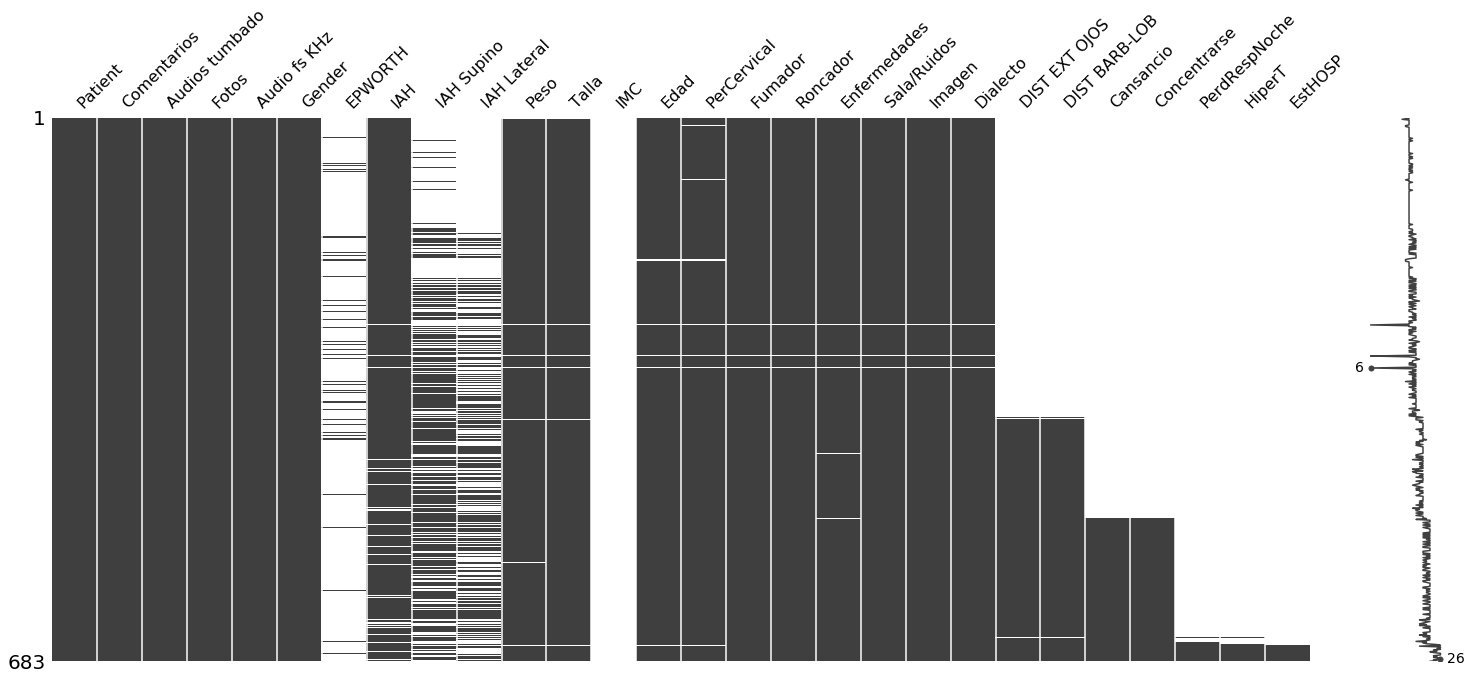

In [95]:
df_ = df_tmp.replace(-1, np.nan)
missingno.matrix(df_[df_.isnull().any(axis=1)])

In [96]:
df_tmp.Imagen.value_counts()

nd                  652
otra habitación      11
camara portatil       4
si                    3
ns                    2
perfil                2
objetos               1
perfil mando          1
fondo termostato      1
fondo                 1
pelo                  1
iluminacion           1
Name: Imagen, dtype: int64

In [97]:
df_tmp.Dialecto.value_counts()

andaluz/Málaga                                         335
andaluz                                                 58
nd                                                      16
Madrid                                                  13
andaluz/Málaga/respiración                               8
                                                      ... 
Bilbao pero lleva muchos años en Malaga                  1
andaluz/Sevilla (profesora)                              1
andaluz/Málaga-Granada                                   1
andaluz/Málaga es de Badajoz pero 35 años en Málaga      1
andaluz/padre del QMH64                                  1
Name: Dialecto, Length: 190, dtype: int64

In [98]:
df_tmp[df_tmp.duplicated()]

,Patient,Comentarios,Audios tumbado,Fotos,Audio fs KHz,Gender,EPWORTH,IAH,IAH Supino,IAH Lateral,Peso,Talla,IMC,Edad,PerCervical,Fumador,Roncador,Enfermedades,Sala/Ruidos,Imagen,Dialecto,DIST EXT OJOS,DIST BARB-LOB,Cansancio,Concentrarse,PerdRespNoche,HiperT,EstHOSP


In [99]:
columns = ['Patient', 'Gender', 'IAH', 'Peso', 'Talla', 'Edad', 'PerCervical', 'Fumador', 'Roncador', 'Enfermedades']
df_tmp1 = pd.DataFrame(df_tmp, columns=columns)
df_tmp1.head(30)

,Patient,Gender,IAH,Peso,Talla,Edad,PerCervical,Fumador,Roncador,Enfermedades
0,P0001,hombre,71.0,82.0,168.0,39.0,-1.0,ns,ns,Septo_Nasal_Desviado
1,P0002,hombre,29.6,119.0,174.0,56.0,48.0,si,ns,nd
2,P0003,hombre,56.0,-1.0,-1.0,46.0,43.0,si,ns,nd
3,P0004,hombre,19.7,78.0,168.0,39.0,42.0,no,ns,Hiperactividad_bronquial
4,P0005,hombre,9.0,80.0,173.0,32.0,40.0,no,ns,Septo_Nasal_Desviado_Operado
5,P0006,hombre,2.0,109.0,190.0,32.0,42.0,no,ns,Hipertrofia_cornetes_nasales
6,P0007,hombre,34.0,86.0,169.0,39.0,42.0,no,ns,Cornetes
7,P0008,hombre,60.0,145.0,172.0,47.0,44.0,no,ns,Rinitis
8,P0009,hombre,22.0,72.0,165.0,40.0,42.0,no,ns,Rinitis crónica
9,P0010,hombre,11.0,80.0,180.0,28.0,38.0,no,ns,no


# NaN manipulation

In [100]:
df_tmp1 = df_tmp1.replace(-1, np.nan)
df_tmp1

,Patient,Gender,IAH,Peso,Talla,Edad,PerCervical,Fumador,Roncador,Enfermedades
0,P0001,hombre,71.0,82.0,168.0,39.0,NaN,ns,ns,Septo_Nasal_Desviado
1,P0002,hombre,29.6,119.0,174.0,56.0,48.0,si,ns,nd
2,P0003,hombre,56.0,NaN,NaN,46.0,43.0,si,ns,nd
3,P0004,hombre,19.7,78.0,168.0,39.0,42.0,no,ns,Hiperactividad_bronquial
4,P0005,hombre,9.0,80.0,173.0,32.0,40.0,no,ns,Septo_Nasal_Desviado_Operado
...,...,...,...,...,...,...,...,...,...,...
678,P0679,hombre,9.2,105.0,180.0,35.0,45.0,no,si,Apnea
679,P0680,hombre,52.2,90.0,180.0,50.0,42.0,no,si,no
680,P0681,hombre,NaN,94.0,177.0,44.0,44.0,no,si,Apnea
681,P0682,mujer,5.4,66.0,164.0,57.0,35.0,si,si,Lupus


In [101]:
df_tmp1.isnull().sum(axis=0).to_frame()  #column

,0
Patient,0
Gender,0
IAH,34
Peso,8
Talla,7
Edad,8
PerCervical,12
Fumador,3
Roncador,3
Enfermedades,5


In [102]:
df_tmp1.isnull().sum(axis=1).sort_values(ascending=False).to_frame().head(11
                                                                         ) #row

,0
260,8
299,8
314,8
663,4
657,4
178,2
179,2
180,2
2,2
379,2


In [103]:
#df_tmp1[df_tmp1['IAH'].isnull()]

In [104]:
df_tmp1.nunique(dropna=False).sort_values(ascending=False)

Patient         682
IAH             306
Enfermedades    249
Peso             90
Edad             65
Talla            53
PerCervical      25
Roncador          9
Fumador           7
Gender            2
dtype: int64

In [105]:
df_mio = df_tmp1.dropna(axis=0, thresh=9)
df_mio

,Patient,Gender,IAH,Peso,Talla,Edad,PerCervical,Fumador,Roncador,Enfermedades
0,P0001,hombre,71.0,82.0,168.0,39.0,NaN,ns,ns,Septo_Nasal_Desviado
1,P0002,hombre,29.6,119.0,174.0,56.0,48.0,si,ns,nd
3,P0004,hombre,19.7,78.0,168.0,39.0,42.0,no,ns,Hiperactividad_bronquial
4,P0005,hombre,9.0,80.0,173.0,32.0,40.0,no,ns,Septo_Nasal_Desviado_Operado
5,P0006,hombre,2.0,109.0,190.0,32.0,42.0,no,ns,Hipertrofia_cornetes_nasales
...,...,...,...,...,...,...,...,...,...,...
678,P0679,hombre,9.2,105.0,180.0,35.0,45.0,no,si,Apnea
679,P0680,hombre,52.2,90.0,180.0,50.0,42.0,no,si,no
680,P0681,hombre,NaN,94.0,177.0,44.0,44.0,no,si,Apnea
681,P0682,mujer,5.4,66.0,164.0,57.0,35.0,si,si,Lupus


In [106]:
df_mio.isnull().sum(axis=1).sort_values(ascending=False).head(30) #row

0      1
539    1
637    1
635    1
634    1
630    1
623    1
602    1
600    1
78     1
563    1
561    1
559    1
558    1
548    1
538    1
649    1
525    1
511    1
503    1
493    1
492    1
490    1
469    1
461    1
444    1
441    1
429    1
422    1
331    1
dtype: int64

In [107]:
df_mio.isnull().sum(axis=1).sort_values(ascending=False).head(15).to_frame #row

<bound method Series.to_frame of 0      1
539    1
637    1
635    1
634    1
630    1
623    1
602    1
600    1
78     1
563    1
561    1
559    1
558    1
548    1
dtype: int64>

In [108]:
df_mio.isnull().sum(axis=0).to_frame #column

<bound method Series.to_frame of Patient          0
Gender           0
IAH             31
Peso             1
Talla            0
Edad             0
PerCervical      4
Fumador          0
Roncador         0
Enfermedades     2
dtype: int64>

In [109]:
df_mio = df_mio[np.isfinite(df_mio['IAH'])]
df_mio.isnull().sum(axis=0).to_frame()

,0
Patient,0
Gender,0
IAH,0
Peso,1
Talla,0
Edad,0
PerCervical,4
Fumador,0
Roncador,0
Enfermedades,2


In [110]:
df_mio = df_mio[np.isfinite(df_mio['Peso'])]
df_mio = df_mio[np.isfinite(df_mio['PerCervical'])]
df_mio['Enfermedades'].fillna('ns', inplace=True)
df_mio

,Patient,Gender,IAH,Peso,Talla,Edad,PerCervical,Fumador,Roncador,Enfermedades
1,P0002,hombre,29.6,119.0,174.0,56.0,48.0,si,ns,nd
3,P0004,hombre,19.7,78.0,168.0,39.0,42.0,no,ns,Hiperactividad_bronquial
4,P0005,hombre,9.0,80.0,173.0,32.0,40.0,no,ns,Septo_Nasal_Desviado_Operado
5,P0006,hombre,2.0,109.0,190.0,32.0,42.0,no,ns,Hipertrofia_cornetes_nasales
6,P0007,hombre,34.0,86.0,169.0,39.0,42.0,no,ns,Cornetes
...,...,...,...,...,...,...,...,...,...,...
676,P0677,mujer,36.3,82.0,165.0,64.0,39.0,antiguo,si,Atrofia trompas nariz y faringitis en prueba
678,P0679,hombre,9.2,105.0,180.0,35.0,45.0,no,si,Apnea
679,P0680,hombre,52.2,90.0,180.0,50.0,42.0,no,si,no
681,P0682,mujer,5.4,66.0,164.0,57.0,35.0,si,si,Lupus


In [111]:
df_mio.isnull().sum(axis=0) #column

Patient         0
Gender          0
IAH             0
Peso            0
Talla           0
Edad            0
PerCervical     0
Fumador         0
Roncador        0
Enfermedades    0
dtype: int64

In [112]:
df_mio[df_mio.isnull().any(axis=1)]

,Patient,Gender,IAH,Peso,Talla,Edad,PerCervical,Fumador,Roncador,Enfermedades


# Categorical manipulation

In [113]:
df_mio.Enfermedades.unique()

array(['nd', 'Hiperactividad_bronquial', 'Septo_Nasal_Desviado_Operado',
       'Hipertrofia_cornetes_nasales', 'Cornetes', 'Rinitis',
       'Rinitis crónica', 'no', 'ns', 'Sinusitis', 'Asma',
       'Bronquitis cronica', 'Tiroides', 'Papiloma paladar', 'Bocio',
       'Septo_Nasal_Desviado_Operado\nHiperactividad branquial',
       'nodulos en cuerdas',
       'Bronquitis cronica\nHiperactividad bronquial', 'Diabetico',
       'operada amigdalitis',
       'abique desviado. Velo del paladar largo. Sindrome de Sjogren (esta relacionado con las glandulas exocrinas, sintomas: sequedad en traquea,laringe,..)\nRinitis alérgicas(fiebre de heno).',
       'Septo_Nasal_Desviado\nPosibiles pólipos nariz (cuesta respirar)',
       'Faringitis de repetición',
       'Septo_Nasal_Desviado\nOperado de amigdalitis',
       'Hipotiroidismo/acatarrada', 'Hiperactividad bronquial',
       'Vegetaciones', 'Septo_Nasal_Desviado', 'Operado de amigdalitis',
       'Hiperactividad bronquial\nPólipos en la

In [114]:
def enfermo(x):
    if len(x) > 3:
        x = 'si'
    if x == 'nd':
        x = 'ns'
    return x
df_mio.Enfermedades = df_mio.Enfermedades.apply(enfermo)
df_mio.Enfermedades.value_counts()

si    357
no    271
ns      9
Name: Enfermedades, dtype: int64

In [115]:
df_mio.Fumador.value_counts()

no           351
si           154
antiguo      113
ns            12
poco           6
si (poco)      1
Name: Fumador, dtype: int64

In [116]:
df_mio.Fumador = df_mio.Fumador.replace('poco', 'si')
df_mio.Fumador = df_mio.Fumador.replace('si (poco)', 'si')

In [117]:
df_mio.Roncador.value_counts()

si                                433
ns                                169
no                                 17
CPAP                               11
no con CPAD                         4
poco                                1
si sin CPAP                         1
si´(protesis boca para dormir)      1
Name: Roncador, dtype: int64

In [118]:
df_mio.Roncador = df_mio.Roncador.replace('poco', 'si')
df_mio.Roncador = df_mio.Roncador.replace('si sin CPAP', 'si')
df_mio.Roncador = df_mio.Roncador.replace('si´(protesis boca para dormir)', 'si')
df_mio.Roncador = df_mio.Roncador.replace('no con CPAD', 'no')

In [119]:
df_mio['BMI']=round(df_mio['Peso']/((df_mio['Talla']/100)**2),2)
df_mio

,Patient,Gender,IAH,Peso,Talla,Edad,PerCervical,Fumador,Roncador,Enfermedades,BMI
1,P0002,hombre,29.6,119.0,174.0,56.0,48.0,si,ns,ns,39.31
3,P0004,hombre,19.7,78.0,168.0,39.0,42.0,no,ns,si,27.64
4,P0005,hombre,9.0,80.0,173.0,32.0,40.0,no,ns,si,26.73
5,P0006,hombre,2.0,109.0,190.0,32.0,42.0,no,ns,si,30.19
6,P0007,hombre,34.0,86.0,169.0,39.0,42.0,no,ns,si,30.11
...,...,...,...,...,...,...,...,...,...,...,...
676,P0677,mujer,36.3,82.0,165.0,64.0,39.0,antiguo,si,si,30.12
678,P0679,hombre,9.2,105.0,180.0,35.0,45.0,no,si,si,32.41
679,P0680,hombre,52.2,90.0,180.0,50.0,42.0,no,si,no,27.78
681,P0682,mujer,5.4,66.0,164.0,57.0,35.0,si,si,si,24.54


In [120]:
df_mio = df_mio.rename(columns = {"Talla": "Height", 
                                "Peso":"Weight", 
                                "Edad": "Age",
                                "PerCervical": "Cervical",
                                "Fumador": "Smoker",
                                "Roncador": "Snorer",
                                "Enfermedades":"Illness"
                                 })
df_mio

,Patient,Gender,IAH,Weight,Height,Age,Cervical,Smoker,Snorer,Illness,BMI
1,P0002,hombre,29.6,119.0,174.0,56.0,48.0,si,ns,ns,39.31
3,P0004,hombre,19.7,78.0,168.0,39.0,42.0,no,ns,si,27.64
4,P0005,hombre,9.0,80.0,173.0,32.0,40.0,no,ns,si,26.73
5,P0006,hombre,2.0,109.0,190.0,32.0,42.0,no,ns,si,30.19
6,P0007,hombre,34.0,86.0,169.0,39.0,42.0,no,ns,si,30.11
...,...,...,...,...,...,...,...,...,...,...,...
676,P0677,mujer,36.3,82.0,165.0,64.0,39.0,antiguo,si,si,30.12
678,P0679,hombre,9.2,105.0,180.0,35.0,45.0,no,si,si,32.41
679,P0680,hombre,52.2,90.0,180.0,50.0,42.0,no,si,no,27.78
681,P0682,mujer,5.4,66.0,164.0,57.0,35.0,si,si,si,24.54


In [121]:
columns_ = ["Patient","Gender","Age","IAH","Cervical","Weight","Height","BMI","Smoker","Snorer","Illness"]
df_final = pd.DataFrame(df_mio, columns=columns_)
df_final

,Patient,Gender,Age,IAH,Cervical,Weight,Height,BMI,Smoker,Snorer,Illness
1,P0002,hombre,56.0,29.6,48.0,119.0,174.0,39.31,si,ns,ns
3,P0004,hombre,39.0,19.7,42.0,78.0,168.0,27.64,no,ns,si
4,P0005,hombre,32.0,9.0,40.0,80.0,173.0,26.73,no,ns,si
5,P0006,hombre,32.0,2.0,42.0,109.0,190.0,30.19,no,ns,si
6,P0007,hombre,39.0,34.0,42.0,86.0,169.0,30.11,no,ns,si
...,...,...,...,...,...,...,...,...,...,...,...
676,P0677,mujer,64.0,36.3,39.0,82.0,165.0,30.12,antiguo,si,si
678,P0679,hombre,35.0,9.2,45.0,105.0,180.0,32.41,no,si,si
679,P0680,hombre,50.0,52.2,42.0,90.0,180.0,27.78,no,si,no
681,P0682,mujer,57.0,5.4,35.0,66.0,164.0,24.54,si,si,si


In [128]:
df_final.describe().iloc[1:].round(2)

,Age,IAH,Cervical,Weight,Height,BMI
mean,49.50,20.39,40.64,87.73,171.28,29.86
std,12.39,18.60,3.96,18.36,9.56,5.62
min,20.00,0.00,30.00,45.00,144.00,18.29
25%,40.00,6.40,38.00,75.00,165.00,26.04
50%,49.00,14.40,41.00,86.00,171.00,28.73
75%,59.00,30.00,43.00,98.00,178.00,32.77
max,88.00,108.60,53.00,165.00,197.00,63.65


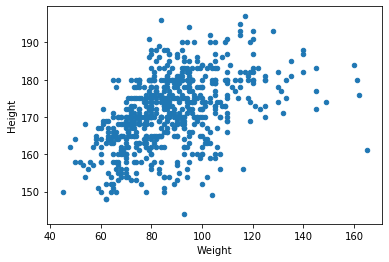

In [126]:
df_final.plot.scatter("Weight","Height")

In [40]:
df_final[["Gender",'Smoker','Snorer','Illness']].apply(pd.Series.value_counts).fillna(0).astype(int)

,Gender,Smoker,Snorer,Illness
CPAP,0,0,11,0
antiguo,0,113,0,0
hombre,455,0,0,0
mujer,182,0,0,0
no,0,351,21,271
ns,0,12,169,9
si,0,161,436,357


In [201]:
df_final.to_csv(r'OSA_propio.csv', index = None, header=True) 